In [146]:
# Example data designed to match examples on slides
import numpy as np
from sklearn.metrics import ndcg_score, dcg_score
class ExampleData:
  actual = set(range(0,20,2))
  actual2 = [1,3,7,9,13,15,17,19]
  primary_example = [0,1,2,4,6,8,10,11,12,13,14,17,19,16,21,23,25,27,29,18]
  first_half_correct = list(range(0,20,2)) + list(range(1,20,2))
  second_half_correct =  list(range(1,20,2)) + list(range(0,20,2))
  swapped_2_3 = [0,2,1,4,6,8,10,11,12,13,14,17,19,16,21,23,25,27,29,18]
  swapped_8_9 = [0,1,2,4,6,8,10,12,11,13,14,17,19,16,21,23,25,27,29,18]
  IR1 = [7,15,13,9,16,19,8,18,17,1,5,2,14,20,4,10,3,11,6,12]
  IR2 = [20,8,9,1,16,3,17,18,4,2,14,7,13,5,11,10,15,6,19,12]
  IR3 = [6,1,16,7,4,19,18,3,20,14,8,5,9,12,13,15,17,2,11,10]
  BIR1 = [1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0]
  BIR2 = [0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0]
  BIR3 = [0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0]
  BIRCAP = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
  BIRCper = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]


def rk(actual, predicted, k):
  # find all the matches from the ones we predicted
  matches = len(set(predicted[:k]) & set(actual))
  if matches == 0:
    return 0
  # what fraction of all the results did we find?
  return float(matches) / len(actual)

def pk(actual, predicted, k):
  """
  calculates P@K

  actual: the unordered set of correct answers
  predicted: the ordered list of predictions
  k: the k the precision is calculated at

  returns float
  """
  # get the first k predicted items
  k_predicted_items = set(predicted[:k])
  # the correct items
  actual = set(actual)
  # how many of those k predicted items are actual items?
  correct = len(k_predicted_items & actual)
  # precision - what fraction of the items is that?
  precision = correct/float(k)
  # return precision at k items
  return precision

def apk(actual, predicted, k=10):
  """
  calculates average precision

  actual: the unordered set of correct answers
  predicted: the ordered list of predictions
  k: the k the precision is calculated at

  returns float
  """
  actual = set(actual)
  k_predicted_items = predicted[:k]
  # find the PK for every one recall increases
  pks = [pk(actual, predicted, i+1)
         for i, p in enumerate(k_predicted_items) if p in actual]
  # return the average
  return sum(pks)/float(len(pks))

def mapk(actuals, predicteds):
  """
  Calculates MAP - Mean Average Precision
  actuals: are a list of lists (actual)
  predicteds: are a list of list (predicted)
  k: the k the precision is calculated at
  returns float
  """
  # find the APK of all the pairs of actual and predict results
  apks = ([apk (a, p, len (p)) for a, p in zip (actuals, predicteds)])
  # take the mean of that list
  return sum(apks) / float(len(apks))

COLOURS = {"END":'\033[0m',"RED":'\033[30;41m',"WHITE":'\033[30;15m'}
DISPLAY_CORRECT = {True: COLOURS["RED"], False: COLOURS["WHITE"]}

def pk_table(actual, predicted, k):
  print("Actual:", actual)
  print("Predicted:", predicted)
  print("{:3} {:^7} {:^5} {:^5}".format("k", "Result", "R@k", "P@k"))
  for k in range(1,min(k, len(predicted))+1):
    rounded_pk = round(pk(actual, predicted,k=k),2)
    rounded_rk = round(rk(actual, predicted,k=k),2)
    is_correct = predicted[k-1] in actual
    print("{:3} {}{:^7}{} {:^5.2f} {:^5.2f}".format(k, DISPLAY_CORRECT[is_correct],predicted[k-1],COLOURS["END"], rounded_rk, rounded_pk))
  print("AP", round(apk(actual, predicted, k),2))
  #print("MAP", round(mapk(actual, predicted),2))
def dcg(relevances, k):
    """Discounted cumulative gain at rank (DCG)"""
    relevances = np.asarray(relevances)[:k]
    n_relevances = len(relevances)
    
    if n_relevances == 0:
        return 0.
    discounts = np.log2(np.arange(n_relevances)+1)
    
    if relevances[0] == 1:
        return (np.sum(relevances[1:] / discounts[1:])+1)
    else:
        return np.sum(relevances[1:]/ discounts[1:])
    

if __name__ == "__main__":
  sep = "-" * 70
  ex = ExampleData

  print(sep)
  print("IR1")
  pk_table(ex.actual2, ex.IR1, 20)
  print("PK",pk(ex.actual2, ex.IR1,5))
  print("RK",rk(ex.actual2, ex.IR1,5))
  print("DCG",dcg(ex.BIR1,20))

  print(sep)
  print("IR2")
  pk_table(ex.actual2, ex.IR2, 20)
  print("PK", pk(ex.actual2, ex.IR2,5)) 
  print("RK", rk(ex.actual2, ex.IR2,5)) 
  print("DCG",dcg(ex.BIR2,20))

  print(sep)
  print("IR3")
  pk_table(ex.actual2, ex.IR3, 20)
  print("PK", pk(ex.actual2, ex.IR3,5))
  print("RK", rk(ex.actual2, ex.IR3,5))
  print("DCG",dcg(ex.BIR3,20))
  
  print(sep)
  print("IRCAP")
  ##pk_table(ex.actual2, ex.IRCAP, 20)
 # print("PK",pk(ex.actual2, ex.IR1,5))
  #print("RK",rk(ex.actual2, ex.IR1,5))
  print("DCG",dcg(ex.BIRCAP,20))
  
  print("IRCAPerfect")
  ##pk_table(ex.actual2, ex.IRCAP, 20)
 # print("PK",pk(ex.actual2, ex.IR1,5))
  #print("RK",rk(ex.actual2, ex.IR1,5))
  print("DCG",dcg(ex.BIRCper,20))

----------------------------------------------------------------------
IR1
Actual: [1, 3, 7, 9, 13, 15, 17, 19]
Predicted: [7, 15, 13, 9, 16, 19, 8, 18, 17, 1, 5, 2, 14, 20, 4, 10, 3, 11, 6, 12]
k   Result   R@k   P@k 
  1    7    0.12  1.00 
  2   15    0.25  1.00 
  3   13    0.38  1.00 
  4    9    0.50  1.00 
  5   16    0.50  0.80 
  6   19    0.62  0.83 
  7    8    0.62  0.71 
  8   18    0.62  0.62 
  9   17    0.75  0.67 
 10    1    0.88  0.70 
 11    5    0.88  0.64 
 12    2    0.88  0.58 
 13   14    0.88  0.54 
 14   20    0.88  0.50 
 15    4    0.88  0.47 
 16   10    0.88  0.44 
 17    3    1.00  0.47 
 18   11    1.00  0.44 
 19    6    1.00  0.42 
 20   12    1.00  0.40 
AP 0.83
PK 0.8
RK 0.5
DCG 4.378927975373935
----------------------------------------------------------------------
IR2
Actual: [1, 3, 7, 9, 13, 15, 17, 19]
Predicted: [20, 8, 9, 1, 16, 3, 17, 18, 4, 2, 14, 7, 13, 5, 11, 10, 15, 6, 19, 12]
k   Result   R@k   P@k 
  1   20    0.00  0.00 
  2    8    0.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

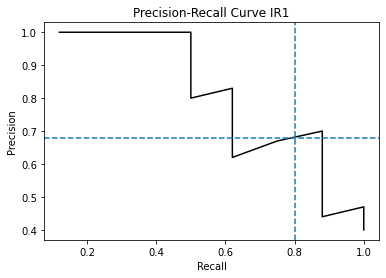

Recall AVG: 0.73
Precision AVG: 0.66
Precison of the system at 80%: 0.67


In [81]:
#calculate precision and recall
ExampleData = ex
#create precision recall curve
fig, ax = plt.subplots()
recall = []
precision = []
name = set(range(1,21))
for x in name:
    recall.append(round(rk(ex.actual2,ex.IR1,x),2))
    precision.append(round(pk(ex.actual2,ex.IR1,x),2))
ax.plot(recall, precision, color='black')

recall_ave = sum(recall)/len(recall)
precision_ave = sum(precision)/len(precision)

#add axis labels to plot
ax.set_title('Precision-Recall Curve IR1')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.axvline(0.8, ls='--')
plt.axhline(0.68, ls='--')
#display plot
plt.show()
print("Recall AVG:" ,round(recall_ave,2))
print("Precision AVG:",round(precision_ave,2))
print("Precison of the system at 80%:", round(precision[8],2))

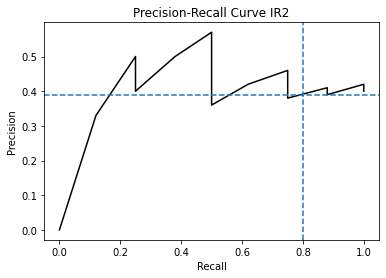

Recall AVG: 0.54
Precision AVG: 0.39
Precison of the system at 80%: 0.38


In [82]:
#calculate precision and recall
ExampleData = ex
#create precision recall curve
fig, ax = plt.subplots()
recall = []
precision = []
name = set(range(1,21))
for x in name:
    recall.append(round(rk(ex.actual2,ex.IR2,x),2))
    precision.append(round(pk(ex.actual2,ex.IR2,x),2))
ax.plot(recall, precision, color='black')

recall_ave = sum(recall)/len(recall)
precision_ave = sum(precision)/len(precision)

#add axis labels to plot
ax.set_title('Precision-Recall Curve IR2')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.axvline(0.8, ls='--')
plt.axhline(0.39, ls='--')

#display plot
plt.show()
print("Recall AVG:" ,round(recall_ave,2))
print("Precision AVG:",round(precision_ave,2))
print("Precison of the system at 80%:", round(precision[15],2))

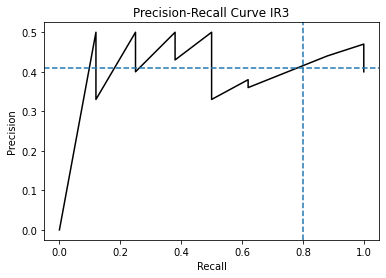

Recall AVG: 0.54
Precision AVG: 0.4
Precison of the system at 80%: 0.4


In [83]:
#calculate precision and recall
ExampleData = ex
#create precision recall curve
fig, ax = plt.subplots()
recall = []
precision = []
name = set(range(1,21))
for x in name:
    recall.append(round(rk(ex.actual2,ex.IR3,x),2))
    precision.append(round(pk(ex.actual2,ex.IR3,x),2))
ax.plot(recall, precision, color='black')

recall_ave = sum(recall)/len(recall)
precision_ave = sum(precision)/len(precision)

#add axis labels to plot
ax.set_title('Precision-Recall Curve IR3')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.axvline(0.8, ls='--')
plt.axhline(0.41, ls='--')

#display plot
plt.show()
print("Recall AVG:" ,round(recall_ave,2))
print("Precision AVG:",round(precision_ave,2))
print("Precison of the system at 80%:", round(precision[14],2))

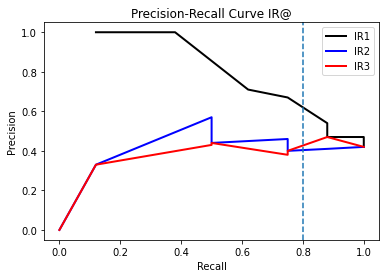

In [143]:
#calculate precision and recall
ExampleData = ex
#create precision recall curve
fig, ax = plt.subplots()
recall = {"IR1":[],"IR2":[],"IR3":[]}
precision = {"IR1":[],"IR2":[],"IR3":[]}

#name = set(range(1,21))
for x in ex.actual2:
    recall["IR1"].append(round(rk(ex.actual2,ex.IR1,x),2))
    precision["IR1"].append(round(pk(ex.actual2,ex.IR1,x),2))
    recall["IR2"].append(round(rk(ex.actual2,ex.IR2,x),2))
    precision["IR2"].append(round(pk(ex.actual2,ex.IR2,x),2))
    recall["IR3"].append(round(rk(ex.actual2,ex.IR2,x),2))
    precision["IR3"].append(round(pk(ex.actual2,ex.IR3,x),2))
ax.plot(recall["IR1"], precision["IR1"], lw=2, color='black', label="IR1")
ax.plot(recall["IR2"], precision["IR2"], lw=2, color='blue', label="IR2")
ax.plot(recall["IR3"], precision["IR3"], lw=2, color='red', label="IR3")

#recall_ave = sum(recall)/len(recall)
#precision_ave = sum(precision)/len(precision)

#add axis labels to plot
ax.set_title('Precision-Recall Curve IR@')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.axvline(0.8, ls='--')

#display plot
plt.legend()
plt.show()
